# (Task7_TSF) Stock Price Prediction using LSTM 

In [1]:
#importreqlibs:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset
data_train= pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#train_model
train_data= data_train.iloc[:,1:2].values
print(train_data)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [4]:
#Normalizing the Dataset.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(train_data)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
#Creating X_train and y_train Data Structures.
x_train=[]
y_train=[]
for i in range(60, 1258):
    x_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)
    

(1198, 60)
(1198,)


In [6]:
#reshape_data:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape


(1198, 60, 1)

In [7]:
# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
model= Sequential()
model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
#fitting model:
hist=model.fit(x_train, y_train, epochs= 20, batch_size=32, verbose=2)

Epoch 1/20
38/38 - 17s - loss: 0.0370 - 17s/epoch - 437ms/step
Epoch 2/20
38/38 - 6s - loss: 0.0047 - 6s/epoch - 152ms/step
Epoch 3/20
38/38 - 6s - loss: 0.0043 - 6s/epoch - 150ms/step
Epoch 4/20
38/38 - 6s - loss: 0.0037 - 6s/epoch - 151ms/step
Epoch 5/20
38/38 - 6s - loss: 0.0039 - 6s/epoch - 154ms/step
Epoch 6/20
38/38 - 6s - loss: 0.0040 - 6s/epoch - 152ms/step
Epoch 7/20
38/38 - 6s - loss: 0.0033 - 6s/epoch - 153ms/step
Epoch 8/20
38/38 - 6s - loss: 0.0038 - 6s/epoch - 150ms/step
Epoch 9/20
38/38 - 6s - loss: 0.0033 - 6s/epoch - 151ms/step
Epoch 10/20
38/38 - 6s - loss: 0.0033 - 6s/epoch - 150ms/step
Epoch 11/20
38/38 - 6s - loss: 0.0034 - 6s/epoch - 149ms/step
Epoch 12/20
38/38 - 6s - loss: 0.0029 - 6s/epoch - 152ms/step
Epoch 13/20
38/38 - 6s - loss: 0.0029 - 6s/epoch - 151ms/step
Epoch 14/20
38/38 - 6s - loss: 0.0027 - 6s/epoch - 151ms/step
Epoch 15/20
38/38 - 6s - loss: 0.0028 - 6s/epoch - 152ms/step
Epoch 16/20
38/38 - 6s - loss: 0.0029 - 6s/epoch - 150ms/step
Epoch 17/20
38/

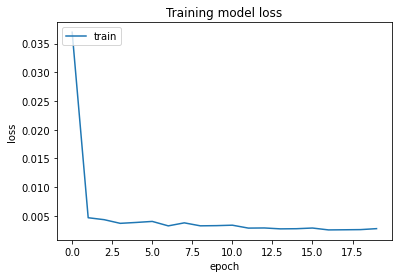

In [10]:
#plotting training model graph:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [11]:
#Extracting the Actual Stock Prices of Jan-2017
test_data= pd.read_csv("Google_Stock_Price_Train.csv")
test_data["Close"]=pd.to_numeric(test_data.Close, errors='coerce')
test_data= test_data.dropna()
test_data= test_data.iloc[:,4:5]
y_test= test_data.iloc[60:,0:].values


In [12]:
#input array for model
inputClosing=test_data.iloc[:,0:].values
inputClosing_scaled=scaler.transform(inputClosing)
inputClosing_scaled.shape

x_test=[]
length=len(test_data)
timestep=60
for i in range(timestep, length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1089, 60, 1)

In [13]:
#Predicting the Values for Jan 2017 Stock Prices.
y_pred =model.predict(x_test)
predicted_stock_price=scaler.inverse_transform(y_pred)

35/35 [==============================] - 4s 54ms/step


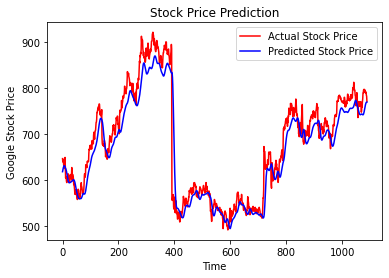

In [14]:
#Plotting the Actual and Predicted Prices for Google Stocks.
plt.plot(y_test, color='red', label="Actual Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()

# Stock Sentiment Analysis using News Headline:

In [15]:
#importreqlibs:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [16]:
#importingdata
df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

In [17]:
#splitingdata
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [18]:
# Removing special characters
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [19]:
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [20]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [21]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [22]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [24]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [25]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [26]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [27]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[145  41]
 [  8 184]]
0.8703703703703703
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       186
           1       0.82      0.96      0.88       192

    accuracy                           0.87       378
   macro avg       0.88      0.87      0.87       378
weighted avg       0.88      0.87      0.87       378

